**Image Processing**

Grey Scale Image

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tensorflow.keras.datasets import mnist

In [ ]:
pd.set_option('display.max_columns', None)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


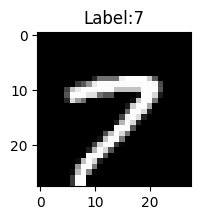

    0   1   2   3   4   5    6    7    8    9    10   11   12   13   14   15   16   17   18   19   20   21  22  23  24  25  26  27
0    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
1    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
2    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
3    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
4    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
5    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0    0   0   0   0   0   0   0
6    0   0   0   0   0   0    0    0    0    0    0    0    0    0    0    0    0  

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()
i = 123
plt.figure(figsize=(2,2))
plt.imshow(x_train[i], cmap='gray')
plt.title(f"Label:{y_train[i]}")
plt.show()
data = pd.DataFrame(x_train[i])
print(data.to_string())


In [ ]:
dtypetrain = type(x_train)
print(dtypetrain)

<class 'numpy.ndarray'>


In [ ]:
shape = x_train.shape
print(shape)

(60000, 28, 28)


In [ ]:
shape = y_train.shape
print(shape)

(60000,)


In [ ]:
shape = x_test.shape
print(shape)

(10000, 28, 28)


In [ ]:
shape = y_test.shape
print(shape)

(10000,)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, Flatten, Activation
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.utils import plot_model


In [ ]:
# Preprocess the data
y_train = to_categorical(y_train, num_classes=10)
y_test = to_categorical(y_test, num_classes=10)

In [ ]:
model = Sequential()
model.add(Input(shape=(28, 28, 1)))
model. add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

In [ ]:
# Compile the model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
# print the model summary
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ flatten (Flatten)               │ (None, 784)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       100,480 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 10)             │           650 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 109,386 (427.29 KB)

 Trainable params: 109,386 (427.29 KB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
# Train the model
history = model.fit(x_train, y_train,
                    batch_size=32,
                    epochs=10,
                    validation_data=(x_test, y_test))

Epoch 1/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 8s 3ms/step - accuracy: 0.7999 - loss: 4.2905 - val_accuracy: 0.9086 - val_loss: 0.3930
Epoch 2/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9241 - loss: 0.3002 - val_accuracy: 0.9343 - val_loss: 0.2685
Epoch 3/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9457 - loss: 0.1935 - val_accuracy: 0.9470 - val_loss: 0.1975
Epoch 4/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9542 - loss: 0.1632 - val_accuracy: 0.9592 - val_loss: 0.1529
Epoch 5/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9640 - loss: 0.1270 - val_accuracy: 0.9548 - val_loss: 0.1703
Epoch 6/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 10s 3ms/step - accuracy: 0.9654 - loss: 0.1213 - val_accuracy: 0.9590 - val_loss: 0.1627
Epoch 7/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 5s 2ms/step - accuracy: 0.9701 - loss: 0.1039 - val_accuracy: 0.9680 - val_loss: 0.1354
Epoch 8/10
1875/1875 ━━━━━━━━━━━━━━━━━━━━ 6s 3ms/step - accuracy: 0.9738 - loss: 0.0941 

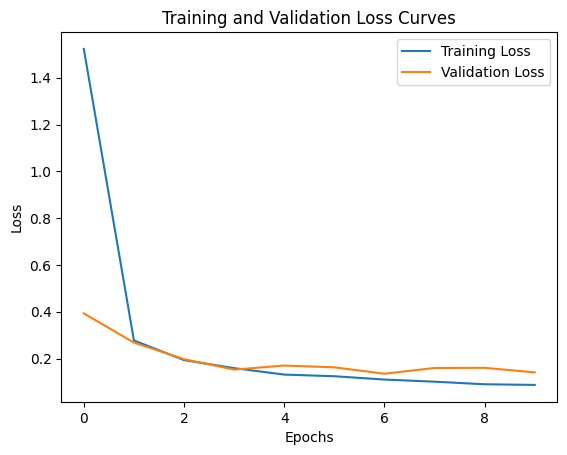

In [ ]:
# Plot train and test loss curves
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss Curves')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
index = 123
probs = model.predict(x_test[index].reshape(1, 28, 28, 1))
pred = np.argmax(probs)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 252ms/step


In [ ]:
print(probs)

[[9.1569287e-11 2.6493332e-09 1.3892320e-08 1.0061491e-09 5.5423596e-11
  3.2677292e-09 9.9999690e-01 1.0272381e-18 3.1168097e-06 2.0355608e-13]]


In [ ]:
np.argmax(probs)

np.int64(6)

In [ ]:
model.save('my_model.keras')